### I. Generating Example Regression Data

In [2]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt

In [10]:
n = 100
beta_0 = 5
beta_1 = 2
np.random.seed(1)

x = 10 * ss.uniform.rvs(size=n)
y = beta_0 + beta_1 * x + ss.norm.rvs(loc=0, scale=1, size=n)

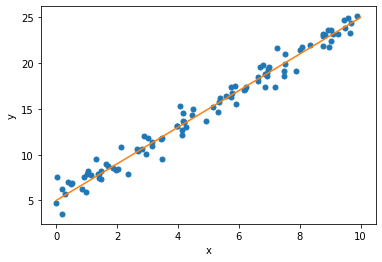

In [11]:
plt.figure()
plt.plot(x, y, "o", ms=5)
xx = np.array([0, 10])
plt.plot(xx, beta_0 + beta_1 * xx)
plt.xlabel("x")
plt.ylabel("y")
plt.show();

In [12]:
print("Mean of x:", np.mean(x))
print("Mean of y:", np.mean(y))

Mean of x: 4.8587792760014565
Mean of y: 14.80142786070299


### II. Simple Linear Regression

The following code implements the residual sum of squares for this regression problem.

In [13]:
def compute_rss(y_estimate, y):
  return sum(np.power(y-y_estimate, 2))
def estimate_y(x, b_0, b_1):
  return b_0 + b_1 * x
# rss = compute_rss(estimate_y(x, beta_0, beta_1), y)

### III. Least Squares Estimation in Code

In [19]:
rss = []
slopes = np.arange(-10, 15, 0.001)
for slope in slopes:
    rss.append(np.sum((y - beta_0 - slope * x)**2))
    
ind_min = np.argmin(rss)

print("Estimate of the slope", slopes[ind_min])

Estimate of the slope 2.003999999993347


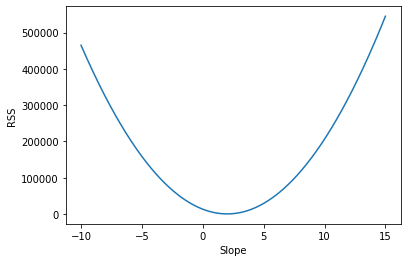

In [20]:
# Plot figure
plt.figure()
plt.plot(slopes, rss)
plt.xlabel("Slope")
plt.ylabel("RSS")
plt.show()

### IV. Simple Linear Regression in Code

In [21]:
import statsmodels.api as sm

In [22]:
mod = sm.OLS(y, x)
est = mod.fit()
print(est.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.968
Model:                            OLS   Adj. R-squared (uncentered):              0.967
Method:                 Least Squares   F-statistic:                              2974.
Date:                Fri, 01 May 2020   Prob (F-statistic):                    1.14e-75
Time:                        15:48:32   Log-Likelihood:                         -246.89
No. Observations:                 100   AIC:                                      495.8
Df Residuals:                      99   BIC:                                      498.4
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [23]:
X = sm.add_constant(x)
mod = sm.OLS(y, X)
est = mod.fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     4115.
Date:                Fri, 01 May 2020   Prob (F-statistic):           7.47e-82
Time:                        15:50:47   Log-Likelihood:                -130.72
No. Observations:                 100   AIC:                             265.4
Df Residuals:                      98   BIC:                             270.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.2370      0.174     30.041      0.0